# 085.PCA (Principal Component Analysis)

- 주성분 분석 결과를 시각화 (고차원 데이터 --> 저차원 mapping)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
churn_df = pd.read_csv("datasets/ChurnData.csv")

In [3]:
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [4]:
A = np.array(churn_df.values)
A.shape

(200, 28)

In [5]:
columns = churn_df.columns[:-1]
columns.size

27

In [6]:
X = np.asarray(churn_df.loc[:, columns], dtype=np.float32)
y = np.asarray(churn_df['churn'])

In [7]:
# train / test dataset split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
print(X_train.shape)
print(X_test.shape)

(160, 27)
(40, 27)


### PCA 적용 전 Logistic Regression

- PCA 적용 후의 결과와 비교 목적

In [10]:
# Fitting Logistic Regression
clf = LogisticRegression(solver='lbfgs', random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
# predict test set
y_pred = clf.predict(X_test)
# Confusion matrix
accuracy_score(y_test, y_pred)

0.775

### PCA 적용

- 27 개의 feature 를 2 개로 차원 축소  


- components_
    - array, shape (n_components, n_features)
    - n_feature dimension 공간에서의 주성분 축  
    - data 의 분산을 최대로 보존하는 방향
    - explained_variance_ 에 순서대로 정렬되어 있음

In [12]:
# Apply kernel PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)                # 2 개 component 로 차원 축소

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [13]:
print("차원 축소된 X_train :", X_train_pca.shape)
print(X_train_pca[:5])
print()
print("차원 축소된 X_test :", X_test_pca.shape)
print(X_test_pca[:5])

차원 축소된 X_train : (160, 2)
[[ 6.1252475  -2.9101765 ]
 [-1.7907679   2.661107  ]
 [-0.61236686  2.6992133 ]
 [ 0.11433139 -1.7805352 ]
 [ 3.1427524   4.7126517 ]]

차원 축소된 X_test : (40, 2)
[[ 0.51772696  1.3013058 ]
 [-0.25383356 -2.9665473 ]
 [-4.058648   -0.6377774 ]
 [-0.52391976  3.185847  ]
 [ 0.6467523   1.1866794 ]]


In [14]:
print(pca.components_.shape)
print()
print("첫번째 주성분 :\n", pca.components_[0])
print()
print('설명된 분산의 비율', pca.explained_variance_ratio_)

(2, 27)

첫번째 주성분 :
 [0.18870418 0.09407654 0.0699944  0.02405301 0.08039877 0.10532471
 0.09130047 0.2201277  0.24022913 0.17035845 0.26783144 0.16389668
 0.2501765  0.28326187 0.17638183 0.2743571  0.22993149 0.24062647
 0.261124   0.07476012 0.22729258 0.21587753 0.06959347 0.17457901
 0.17900118 0.07082597 0.29324   ]

설명된 분산의 비율 [0.2519348  0.21764474]


### numpy 의 singular value decomposition 을 이용하여 검증

In [15]:
u, s, vh = np.linalg.svd(X_train)

print(X_train.shape)
print(u.shape)
print(s.shape)
print(vh.shape)
print(vh[0])

(160, 27)
(160, 160)
(27,)
(27, 27)
[-0.18870384 -0.09407628 -0.06999422 -0.02405283 -0.08039881 -0.10532453
 -0.09130058 -0.2201276  -0.24022928 -0.17035809 -0.26783153 -0.16389681
 -0.25017628 -0.283262   -0.17638144 -0.27435708 -0.22993116 -0.24062663
 -0.26112413 -0.0747603  -0.22729267 -0.21587761 -0.06959357 -0.17457865
 -0.17900112 -0.07082587 -0.2932401 ]


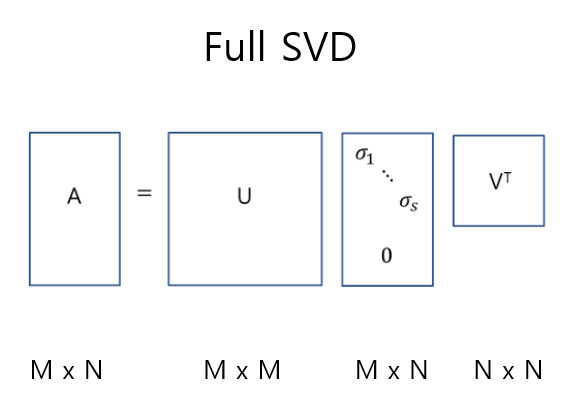

## 차원 축소된 주성분을 이용한 Logistic Regression

In [16]:
# Fitting Logistic Regression
clf = LogisticRegression(solver='lbfgs', random_state=0)
clf.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
# predict test set
y_pred = clf.predict(X_test_pca)
y_pred

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [18]:
# Confusion matrix
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.725

In [19]:
sum(pca.explained_variance_ratio_)

0.4695795327425003

## 차원 축소된 churn data 시각화
- 27 개의 feature 가 2 개의 PCA 로 차원 축소 되었으므로 평면상으로 각 label 의 분포를 시각화 가능

In [20]:
X_train_pca.shape

(160, 2)

In [21]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['r', 'b', 'g', 'c'])

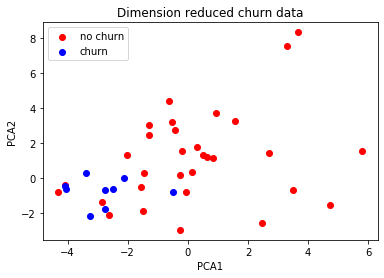

In [27]:
plt.figure(figsize=(6, 4))

X1, X2 = X_test_pca[y_test == 0, 0], X_test_pca[y_test == 0, 1]
plt.scatter(X1, X2, color=cmap(0), label='no churn')

X1, X2 = X_test_pca[y_test == 1, 0], X_test_pca[y_test == 1, 1]
plt.scatter(X1, X2, color=cmap(1), label='churn')

plt.title('Dimension reduced churn data')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()

plt.show()

- PCA1, PCA2 가 낮은 고객의 이탈 가능성이 높음